# Python API Homework - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

### Before You Begin

1. Create a new repository for this project called `python-api-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for both of the  Python Challenges. Use folder names corresponding to the challenges: **WeatherPy**.

4. Inside the folder that you just created, add new files called `WeatherPy.ipynb` and `VacationPy.ipynb`. These will be the main scripts to run for each analysis.

5. Push the above changes to GitHub.

## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is analyzing, any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [209]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [210]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city

#list and record checker
record = 0
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
windspeed = []


#append lists for reach city found and print found status
for city in cities:
    record += 1
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    if (str(response) == '<Response [200]>'):
        print(f'Processing Record {record}: {city}')
        city_name.append(city_json['name'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        windspeed.append(city_json['wind']['speed'])
    else:
        print('City not found. Skipping...')
    # this if statement will limit the amount of cities checked, use to avoid running all 500+ cities
    if record >= 100:
        break
    # sleep timer to prevent bandwidth maxing for API
    time.sleep(1)

    
#Turn appended lists into dictionary
weather_dict = {'City':city_name,
                'Cloudiness':cloudiness,
                'Country':country,
                'Date':date,
                'Humidity':humidity,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Wind Speed':windspeed}

#Turn dictionary into dataframe
weather_df = pd.DataFrame(weather_dict)

Processing Record 1: yar-sale
Processing Record 2: butaritari
Processing Record 3: teya
Processing Record 4: arraial do cabo
Processing Record 5: barrow
Processing Record 6: san policarpo
Processing Record 7: albany
Processing Record 8: yakeshi
Processing Record 9: airai
Processing Record 10: narsaq
Processing Record 11: ribeira grande
Processing Record 12: panaba
Processing Record 13: albanel
Processing Record 14: latung
Processing Record 15: tuatapere
Processing Record 16: punta arenas
Processing Record 17: rikitea
Processing Record 18: hamilton
Processing Record 19: kysyl-syr
Processing Record 20: husavik
Processing Record 21: athabasca
Processing Record 22: bang saphan
Processing Record 23: rio gallegos
Processing Record 24: shahr-e kord
Processing Record 25: flinders
Processing Record 26: kodiak
Processing Record 27: severo-kurilsk
Processing Record 28: bluff
Processing Record 29: port alfred
Processing Record 30: cape town
Processing Record 31: mataura
Processing Record 32: winne

In [211]:
# export dataframe to csv
export_csv = weather_df.to_csv (output_data_file, index = None, header=True)
# counts for Dataframe
weather_df.count()

City          91
Cloudiness    91
Country       91
Date          91
Humidity      91
Lat           91
Lng           91
Max Temp      91
Wind Speed    91
dtype: int64

In [212]:
# display Dataframe head
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yar-Sale,90,RU,1569509023,89,66.83,70.83,34.87,6.85
1,Butaritari,49,KI,1569509025,68,3.07,172.79,84.73,11.88
2,Teya,90,MX,1569509026,94,21.05,-89.07,78.80,6.11
3,Arraial do Cabo,90,BR,1569509027,94,-22.97,-42.02,69.80,11.41
4,Barrow,0,AR,1569509028,51,-38.31,-60.23,67.27,12.50
5,San Policarpo,52,PH,1569509029,84,12.18,125.51,79.69,4.88
6,Albany,90,US,1569509030,63,42.65,-73.75,70.00,13.87
7,Yakeshi,37,CN,1569509032,44,49.28,120.73,55.75,5.35
8,Airai,0,TL,1569509033,87,-8.93,125.41,69.07,4.83
9,Narsaq,5,GL,1569509034,40,60.91,-46.05,46.40,4.70


## Data Scatterplots

#### Latitude vs. Temperature Plot

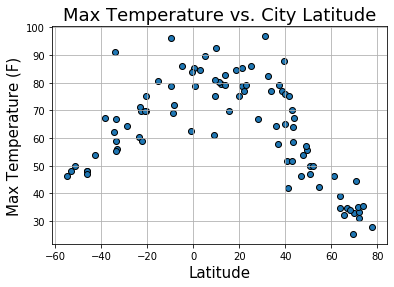

<Figure size 720x720 with 0 Axes>

In [301]:
lat_temp_plot = plt.scatter(weather_df['Lat'],weather_df['Max Temp'],marker='o',edgecolors='black')
plt.grid()
plt.title('Max Temperature vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.figure(figsize=(10, 10))
plt.show()

This plot shows the relationship between latittude and temperature in the selected cities. 

A trend is shown where the closer a city is to the equator, the higher the max temperature. As you move away from the equator, the max temperature gradually decreases with cities above the equator showing a marginally larger decreases.

#### Latitude vs. Humidity Plot

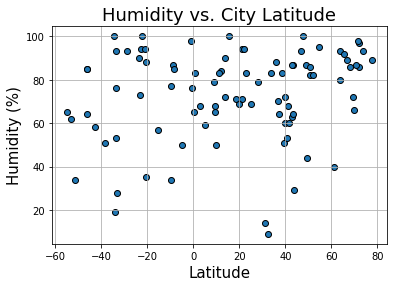

<Figure size 720x720 with 0 Axes>

In [300]:
lat_hum_plot = plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker='o',edgecolors='black')
plt.grid()
plt.title('Humidity vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.figure(figsize=(10, 10))
plt.show()

This plot shows the relationship between latittude and humidity in the selected cities. 

Locations south of the equator seem to have a higher average humidity, while it is more varied above the equator.

#### Latitude vs. Cloudiness Plot

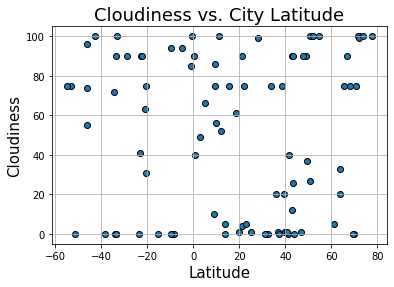

<Figure size 720x720 with 0 Axes>

In [299]:
lat_cloud_plot = plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker='o',edgecolors='black')
plt.grid()
plt.title('Cloudiness vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness',size=15)
plt.figure(figsize=(10, 10))
plt.show()

This plot shows the relationship between latittude and cloudiness in the selected cities. 

Latitude does not seem to greatly affect cloudiness.

#### Latitude vs. Wind Speed Plot

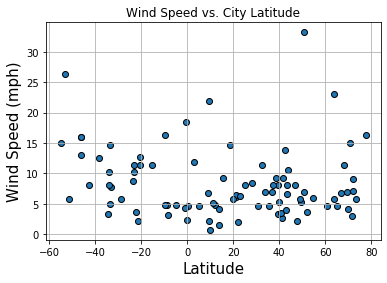

<Figure size 720x720 with 0 Axes>

In [298]:
lat_ws_plot = plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker='o',edgecolors='black')
plt.grid()
plt.title('Wind Speed vs. City Latitude')
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.figure(figsize=(10, 10))
plt.show()

This plot shows the relationship between latittude and wind speed in the selected cities. 

As shown, as you move farther from the equator (latittude = 0) there is an small net increase in wind speed. 

## Linear Regression

In [297]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
weather_df_north = weather_df[weather_df['Lat'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = weather_df[weather_df['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

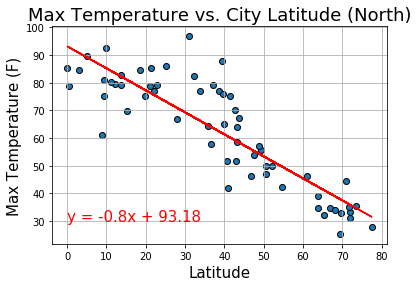

<Figure size 720x720 with 0 Axes>

The r squared is: -0.8716084925072035


In [289]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.figure(figsize=(10,10))
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

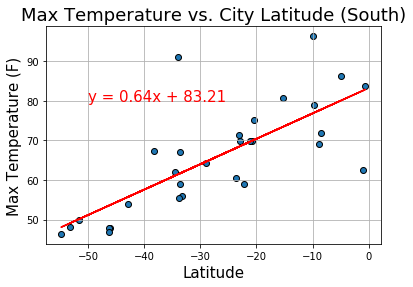

<Figure size 720x720 with 0 Axes>

The r squared is: 0.7487959729816439


In [290]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,80),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.figure(figsize=(10,10))
plt.show()

#r2
print(f'The r squared is: {rvalue}')

### Max Temp vs. Latitutde Linear Regression Comparison
* Both the northern and southern hemispheres have a net drop in temperature as you move away from the equator (latititude = 0).
* The slope of the graph isnt horizontal which indicates a clear net change in temperature as you move from the Equator.
* The linear regression lines shows a steeper slope for the northern hemisphere which indicates that there is a steeper drop in temperature in the North as you move further from the Equator.

Note: All the following slopes listed within Regression Comparisons will be normalized for direction away from the equator. Positive slope will indicate a net increase moving away from the equator, while negative slope will indicate a net decrease as you move away from the equator.

####  Northern Hemisphere - Latitude Linear Regression vs. Humidity (%)

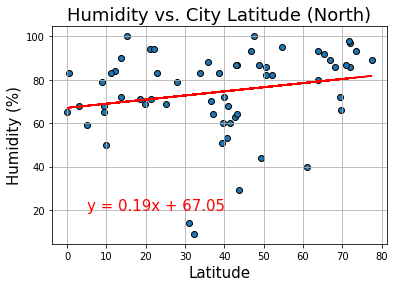

<Figure size 720x720 with 0 Axes>

The r squared is: 0.21354095582259805


In [291]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.figure(figsize=(10,10))
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Latitude Linear Regression vs. Humidity (%)


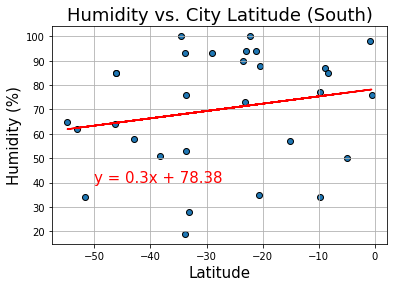

<Figure size 720x720 with 0 Axes>

The r squared is: 0.20062164884768915


In [302]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,40),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.figure(figsize=(10,10))
plt.show()

#r2
print(f'The r squared is: {rvalue}')

### Humidity vs. Latitutde Linear Regression Comparison
* Both hemispheres show very slight changes in Humidity as you move away from the equator (latititude = 0).
* As you move further North, the humidity increases very slightly (slope = 0.19)
* As you move further South, the humidity decreases very slightly (slope = -0.3)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

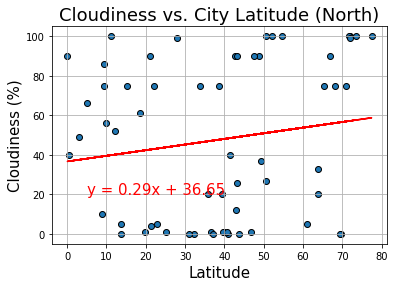

<Figure size 720x720 with 0 Axes>

The r squared is: 0.15672397424580475


In [293]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.figure(figsize=(10,10))
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

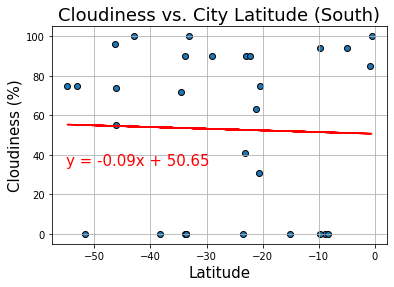

<Figure size 720x720 with 0 Axes>

The r squared is: -0.03275365041667403


In [294]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,35),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.figure(figsize=(10,10))
plt.show()

#r2
print(f'The r squared is: {rvalue}')

### Cloudiness vs. Latitutde Linear Regression Comparison
* Both hemispheres show a net increase in cloudiness as  you move away from the equator (latititude = 0).
* As you move further North, there is a noticeable net increase in cloudiness (slope = 0.29).
* However, as you move further South the net increase is miniscule (slope = 0.09).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


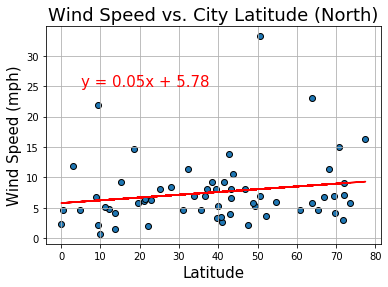

<Figure size 720x720 with 0 Axes>

The r squared is: 0.18071292126132005


In [295]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,25),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.figure(figsize=(10,10))
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

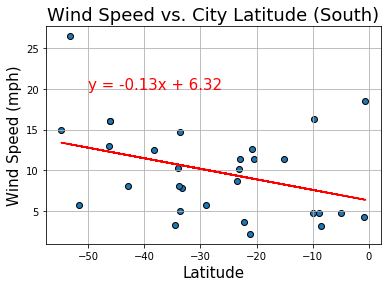

<Figure size 720x720 with 0 Axes>

The r squared is: -0.36577773026307736


In [296]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,20),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.figure(figsize=(10,10))
plt.show()

#r2
print(f'The r squared is: {rvalue}')

### Wind Speed (mph) vs. Latitutde Linear Regression Comparison
* The graphs show a net increase in windspeed as you move away from the equator.
* The slopes show that the change in wind speed is more gradual.
* While the slopes are similar, the linear regression line does show a slightly sharper increase in wind speed as you move further South.